In [2]:
import sys; sys.path.append('..'); from wwa import *

# define smaller box based on observed track
xn,xx,yn,yx = [115,135,10,30]
study_region = {"lon" : slice(115,135), "lat" : slice(10,30)}

mapproj = cartopy.crs.PlateCarree()

## Choose study region

In [22]:
df = pd.read_csv("ibtracs.since1980.list.v04r01.csv")
df = df.loc[(df.NAME == "GAEMI") & (df.SEASON == 2024)]

/var/tmp/pbs.9908534.pbs/ipykernel_2239023/1006922917.py:1: DtypeWarning: Columns (1,2,8,9,14,172,173) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("ibtracs.since1980.list.v04r01.csv")


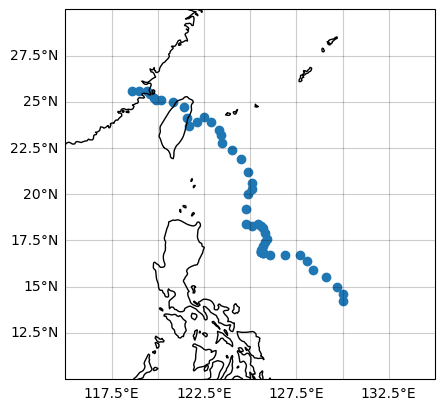

In [108]:
fig, ax = plt.subplots(subplot_kw = {"projection" : mapproj, "extent" : (xn,xx,yn,yx)})
ax.coastlines()
ax.scatter(df.LON, df.LAT)
ax.gridlines(color = "k", alpha = 0.2, draw_labels = ["left", "bottom"])

plt.savefig("fig/sst-pi-study-area.png")

In [28]:
# find box around storm track with a few degrees spare
[df.LON.min()-5, df.LON.max()+5, df.LAT.min()-5, df.LAT.max()+5]

[113.6, 135.0, 9.2, 30.6]

## Daily PI & SST over study region

In [50]:
sst = wrap_lon(xr.open_dataset("data/era5_pi/sst-daily_era5_2024.nc")).sst
pi = wrap_lon(xr.open_dataset("data/era5_pi/pi_era5_2024.nc")).vmax

In [55]:
sst_ts = sst.sel(longitude = slice(xn,xx), latitude = slice(yn,yx)).mean(["latitude", "longitude"], skipna = True)
pi_ts = pi.sel(lon = slice(xn,xx), lat = slice(yn,yx)).mean(["lat", "lon"], skipna = True)

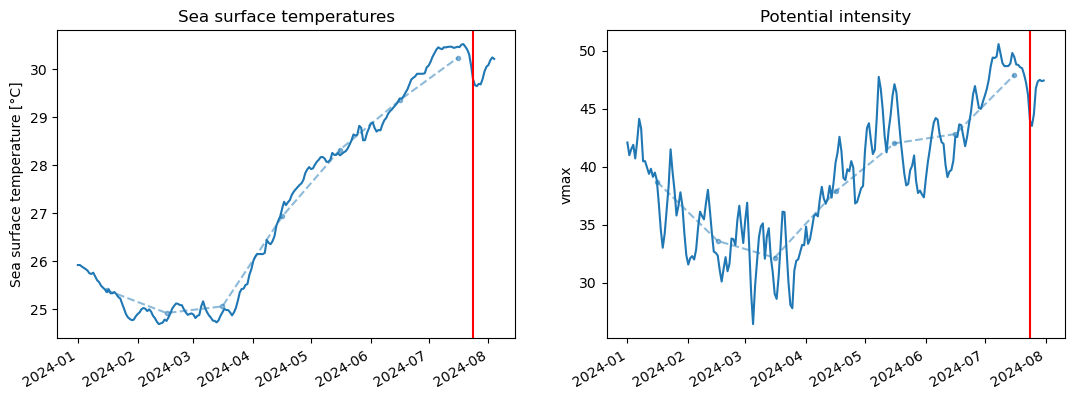

In [107]:
fig, axs = plt.subplots(ncols = 2, figsize = (13,4))

sst_ts.plot(ax = axs[0])
sst_ts.sel(time = slice(None, "2024-07")).resample(time = "MS", loffset = pd.Timedelta(15, "D")).mean().plot(ax = axs[0], ls = "--", alpha = 0.5, color = "tab:blue", marker = ".")

axs[0].set_title("Sea surface temperatures")
pi_ts.plot(ax = axs[1])
pi_ts.sel(time = slice(None, "2024-07")).resample(time = "MS", loffset = pd.Timedelta(15, "D")).mean().plot(ax = axs[1], ls = "--", alpha = 0.5, color = "tab:blue", marker = ".")

axs[1].set_title("Potential intensity")

for ax in axs:
    ax.axvline(datetime(2024,7,24), color = "red")
    ax.set_xlabel("")
    
plt.savefig("fig/sst-pi_monthly-daily.png")

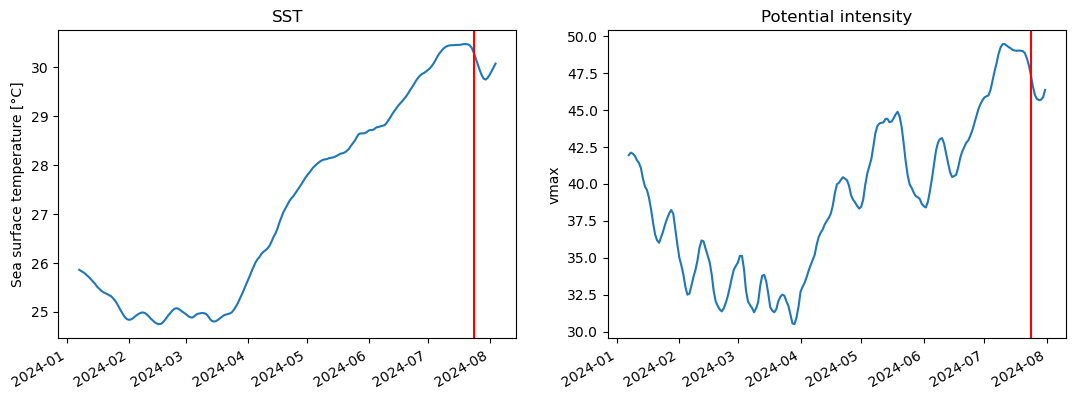

In [78]:
fig, axs = plt.subplots(ncols = 2, figsize = (13,4))

sst_ts.rolling(time = 7).mean().plot(ax = axs[0])
axs[0].set_title("SST")
pi_ts.rolling(time = 7).mean().plot(ax = axs[1])
axs[1].set_title("Potential intensity")

for ax in axs:
    ax.axvline(datetime(2024,7,24), color = "red")
    ax.set_xlabel("")

In [113]:
ds = wrap_lon(xr.open_dataset("/rds/general/user/cb2714/home/00_WWA_project_folder/ephemeral/typhoon_gaemi/mpi_vmax_mm_halfdeg_1979-2023.nc").vmax)

In [118]:
ts = ds.sel(longitude = slice(xn,xx), latitude = slice(yn,yx)).mean(["latitude", "longitude"])

In [121]:
ts.to_netcdf("data/pi_monthly_era5.nc")

## Event maps

In [52]:
pi = xr.open_dataset("era5_monthly_vmax.nc").vmax_msl.sel(time = "2024-07")
# sst = xr.open_dataset("era5_monthly_pi-vars.nc").sst.sel(time = "2024-07")
sst_clim = xr.concat([xr.open_dataset("data/era5_pi/sst-daily_era5_"+str(y)+".nc") for y in range(1990,2021)], "time").groupby("time.month")[7].mean("time").sst
sst_2024 = xr.open_dataset("data/era5_pi/sst-daily_era5_2024.nc").sel(time = "2024-07").mean("time").sst
anom_july = sst_2024 - sst_clim

In [51]:
df = pd.read_csv("ibtracs.since1980.list.v04r01.csv")
df = df.loc[(df.NAME == "GAEMI") & (df.SEASON == 2024)]

In [62]:
df.columns.values

array(['SID', 'SEASON', 'NUMBER', 'BASIN', 'SUBBASIN', 'NAME', 'ISO_TIME',
       'NATURE', 'LAT', 'LON', 'WMO_WIND', 'WMO_PRES', 'WMO_AGENCY',
       'TRACK_TYPE', 'DIST2LAND', 'LANDFALL', 'IFLAG', 'USA_AGENCY',
       'USA_ATCF_ID', 'USA_LAT', 'USA_LON', 'USA_RECORD', 'USA_STATUS',
       'USA_WIND', 'USA_PRES', 'USA_SSHS', 'USA_R34_NE', 'USA_R34_SE',
       'USA_R34_SW', 'USA_R34_NW', 'USA_R50_NE', 'USA_R50_SE',
       'USA_R50_SW', 'USA_R50_NW', 'USA_R64_NE', 'USA_R64_SE',
       'USA_R64_SW', 'USA_R64_NW', 'USA_POCI', 'USA_ROCI', 'USA_RMW',
       'USA_EYE', 'TOKYO_LAT', 'TOKYO_LON', 'TOKYO_GRADE', 'TOKYO_WIND',
       'TOKYO_PRES', 'TOKYO_R50_DIR', 'TOKYO_R50_LONG', 'TOKYO_R50_SHORT',
       'TOKYO_R30_DIR', 'TOKYO_R30_LONG', 'TOKYO_R30_SHORT', 'TOKYO_LAND',
       'CMA_LAT', 'CMA_LON', 'CMA_CAT', 'CMA_WIND', 'CMA_PRES', 'HKO_LAT',
       'HKO_LON', 'HKO_CAT', 'HKO_WIND', 'HKO_PRES', 'KMA_LAT', 'KMA_LON',
       'KMA_CAT', 'KMA_WIND', 'KMA_PRES', 'KMA_R50_DIR', 'KMA_R50_LONG',
  

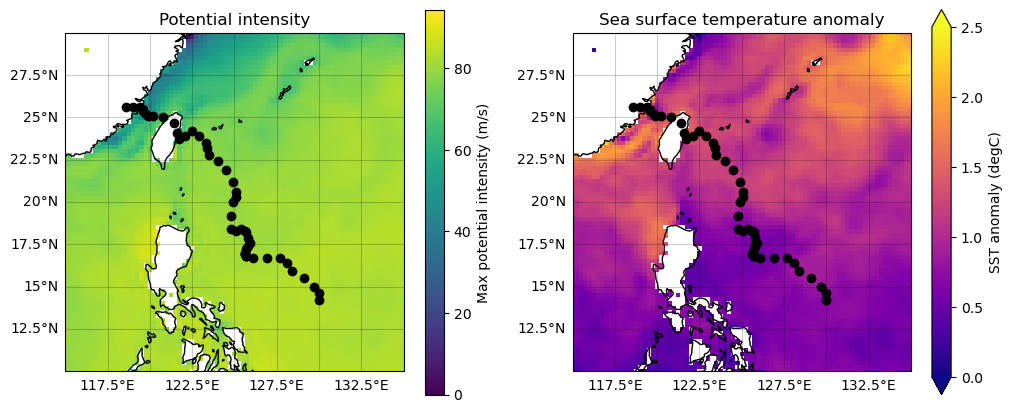

In [58]:
fig, axs = plt.subplots(ncols = 2, figsize = (12,5), subplot_kw = {"projection" : mapproj, "extent" : (xn,xx,yn,yx)})

ax = axs[0]
pi.plot(ax = ax, cbar_kwargs = {"label" : "Max potential intensity (m/s)"})
ax.set_title("Potential intensity")

ax = axs[1]
anom_july.plot(ax = ax, vmin = 0, vmax = 2.5, cmap = "plasma", cbar_kwargs = {"label" : "SST anomaly (degC)"})
ax.set_title("Sea surface temperature anomaly")

for ax in axs:
    ax.coastlines()
    ax.scatter(df.LON, df.LAT, color = "k")
    ax.gridlines(color = "k", alpha = 0.2, draw_labels = ["left", "bottom"])

plt.savefig("fig/event-def_pi-sst.png")

### SST anomaly

In [31]:
sst_clim = xr.concat([xr.open_dataset("data/era5_pi/sst-daily_era5_"+str(y)+".nc") for y in range(1990,2021)], "time").groupby("time.month")[7].mean("time").sst
sst_2024 = xr.open_dataset("data/era5_pi/sst-daily_era5_2024.nc").sel(time = "2024-07").mean("time").sst

In [32]:
anom_allmonths = sst_2024 - sst_clim.mean("time")
anom_jjas = sst_2024 - sst_clim.sel(time = [m in [6,7,8,9] for m in sst_clim.time.dt.month]).mean("time")
anom_july = sst_2024 - sst_clim.groupby("time.month")[7].mean("time")

Text(0.5, 1.0, 'July')

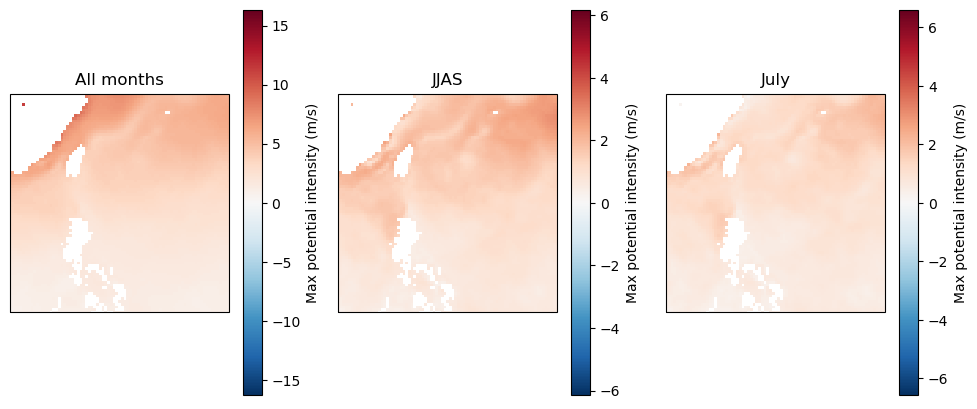

In [33]:
nc = 3
fig, axs = plt.subplots(ncols = nc, figsize = (nc*4,5), subplot_kw = {"projection" : mapproj, "extent" : (xn,xx,yn,yx)})

ax = axs[0]
anom_allmonths.plot(ax = ax, cbar_kwargs = {"label" : "Max potential intensity (m/s)"})
ax.set_title("All months")

ax = axs[1]
anom_jjas.plot(ax = ax, cbar_kwargs = {"label" : "Max potential intensity (m/s)"})
ax.set_title("JJAS")

ax = axs[2]
anom_july.plot(ax = ax, cbar_kwargs = {"label" : "Max potential intensity (m/s)"})
ax.set_title("July")

Text(0.5, 1.0, 'July 2024 SST anomaly wrt July 1990-2020')

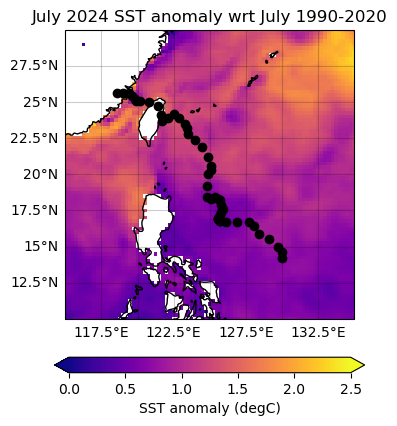

In [49]:
nc = 1
fig, axs = plt.subplots(ncols = nc, figsize = (nc*4,5), subplot_kw = {"projection" : mapproj, "extent" : (xn,xx,yn,yx)})

ax = axs
anom_july.plot(ax = ax, vmin = 0, vmax = 2.5, cmap = "plasma", cbar_kwargs = {"location" : "bottom", "pad" : 0.1, "label" : "SST anomaly (degC)"})
ax.coastlines()
ax.scatter(df.LON, df.LAT, color = "k")
ax.gridlines(color = "k", alpha = 0.2, draw_labels = ["left", "bottom"])
ax.set_title("July 2024 SST anomaly wrt July 1990-2020")

# Precipitation event map

In [91]:
ds = xr.open_dataset("9e2acb288299e8d1ffd214ee9469d55d.nc").resample(valid_time = "D").sum().tp.squeeze(drop = False).rename(valid_time = "time")
ds = convert_units_to(ds, "mm").sel(time = slice("2024-07-22", "2024-07-28"))

In [92]:
hunan = gpd.read_file("sf/hunan")
taiwan = gpd.read_file("sf/taiwan")
nph = gpd.read_file("sf/north_pp")

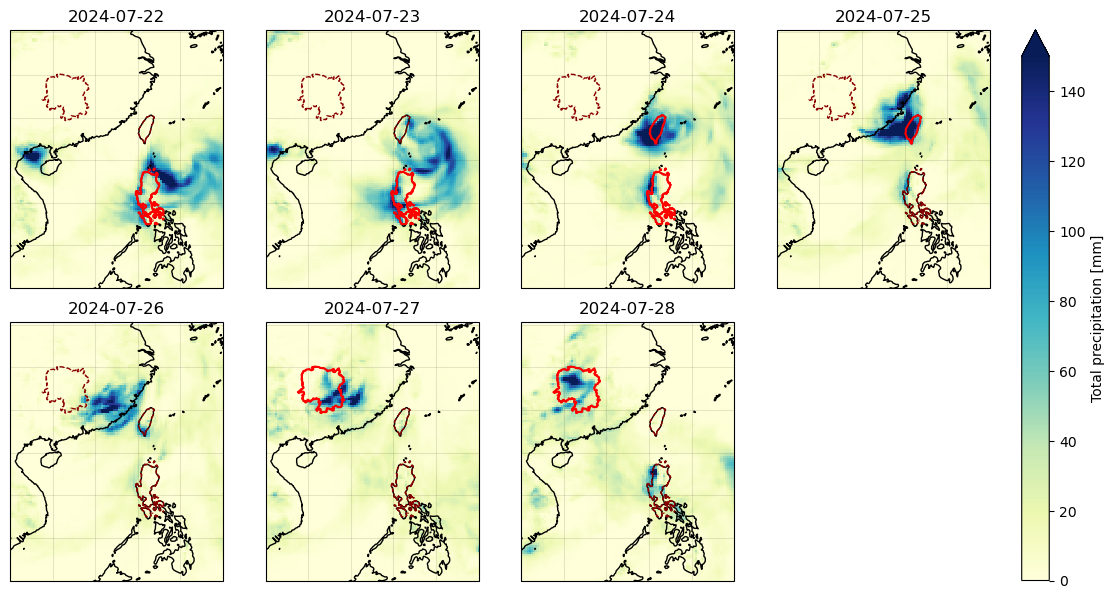

In [93]:
ds.plot(col = "time", col_wrap = 4, cmap = "YlGnBu", vmax = 150, subplot_kws = {"projection" : cartopy.crs.PlateCarree(), "extent" : (105,130,5,35)},
       cbar_kwargs = {"pad" : 0.025})

for ax in plt.gcf().axes[:7]:
    ax.coastlines(lw = 1)
    ax.set_title(ax.get_title().split(" ")[-1])
    pd.concat([hunan, taiwan,nph]).boundary.plot(ax = ax, color = "darkred", lw = 1, ls = "--")
    ax.gridlines(color = "k", alpha = 0.1)
    
for ax in plt.gcf().axes[:3]: nph.boundary.plot(ax = ax, color = "red", lw = 1.5)
for ax in plt.gcf().axes[2:4]: taiwan.boundary.plot(ax = ax, color = "red", lw = 1.5)
for ax in plt.gcf().axes[5:7]: hunan.boundary.plot(ax = ax, color = "red", lw = 1.5)
    
plt.savefig("fig/event-def_daily-rainfall_era5.png")

# Precipitation event map - MSWEP

In [ ]:
hunan = gpd.read_file("sf/hunan")
taiwan = gpd.read_file("sf/taiwan")
nph = gpd.read_file("sf/north_pp")

In [94]:
ds = xr.open_mfdataset([fnm for fnm in sorted(glob.glob("/rds/general/user/cb2714/home/00_WWA_project_folder/live/data/mswep/2024/*.nc")) if fnm[-6:-3] > "203"][:10]).precipitation
ds = convert_units_to(wrap_lon(ds).sel(lon = slice(105,135), lat = slice(5,35), time = slice("2024-07-22", "2024-07-28")), "mm/day")

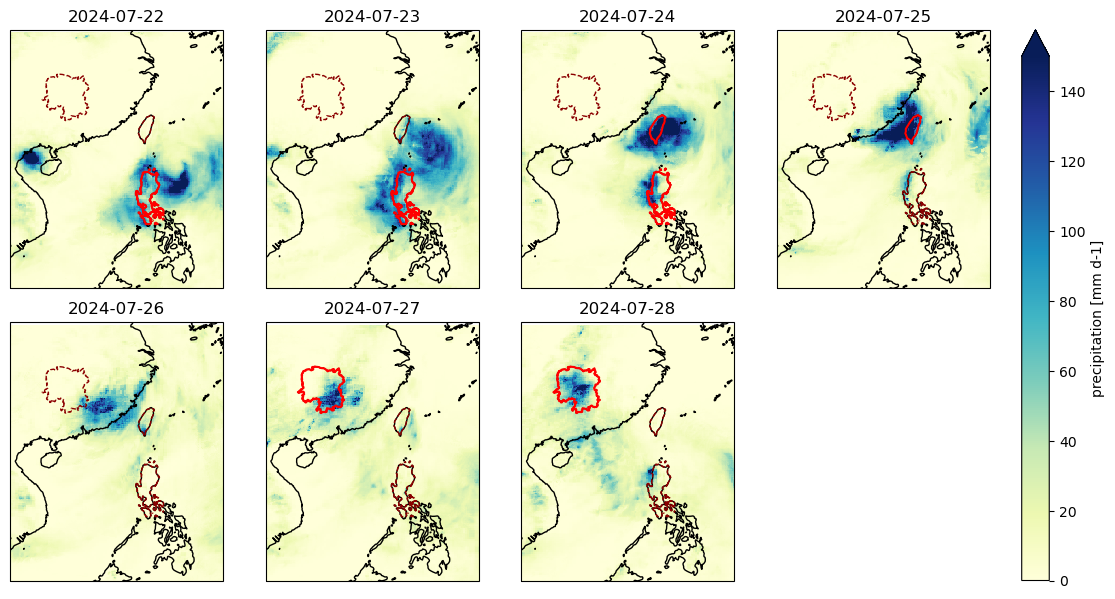

In [95]:
ds.plot(col = "time", col_wrap = 4, cmap = "YlGnBu", vmax = 150, subplot_kws = {"projection" : cartopy.crs.PlateCarree(), "extent" : (105,130,5,35)},
       cbar_kwargs = {"pad" : 0.025})

for ax in plt.gcf().axes[:7]:
    ax.coastlines(lw = 1)
    ax.set_title(ax.get_title().split(" ")[-1])
    pd.concat([hunan, taiwan,nph]).boundary.plot(ax = ax, color = "darkred", lw = 1, ls = "--")
    
for ax in plt.gcf().axes[:3]: nph.boundary.plot(ax = ax, color = "red", lw = 1.5)
for ax in plt.gcf().axes[2:4]: taiwan.boundary.plot(ax = ax, color = "red", lw = 1.5)
for ax in plt.gcf().axes[5:7]: hunan.boundary.plot(ax = ax, color = "red", lw = 1.5)
    
plt.savefig("fig/event-def_daily-rainfall_mswep.png")